<a href="https://colab.research.google.com/github/shonyeajin/KCBD/blob/main/%EC%BC%80%EC%B0%BD%EB%B0%B0%EB%94%A5_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimention=10000):
  results=np.zeros((len(sequences),dimention))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [7]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [10]:
x_train.shape

(25000, 10000)

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 85ms/step - loss: 0.5133 - acc: 0.7902 - val_loss: 0.3859 - val_acc: 0.8714
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3089 - acc: 0.9017 - val_loss: 0.3149 - val_acc: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2248 - acc: 0.9291 - val_loss: 0.2790 - val_acc: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1780 - acc: 0.9447 - val_loss: 0.2754 - val_acc: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1455 - acc: 0.9544 - val_loss: 0.2974 - val_acc: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1181 - acc: 0.9651 - val_loss: 0.3024 - val_acc: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0983 - acc: 0.9702 - val_loss: 0.3136 - val_acc: 0.8819
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0814 - a

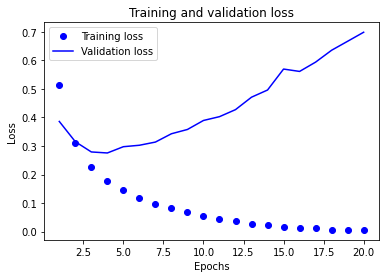

In [26]:
import matplotlib.pyplot as plt

history_dict= history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs= range(1, len(loss)+1)
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() #범례 표시

plt.show()

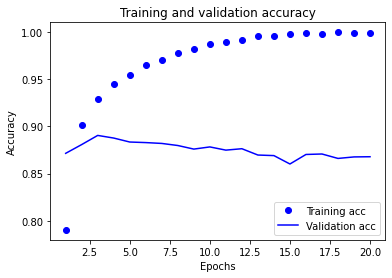

In [27]:
plt.clf() #그래프 초기화
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

과대 적합~~!

In [30]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4622 - accuracy: 0.8140
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2634 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2030 - accuracy: 0.9287
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2926 - accuracy: 0.8842


In [33]:
results # loss, acc

[0.2926039695739746, 0.8841999769210815]

In [34]:
model.predict(x_test)

array([[0.2172122 ],
       [0.9990133 ],
       [0.9450286 ],
       ...,
       [0.147318  ],
       [0.08819062],
       [0.68283784]], dtype=float32)